# Going Deeper

*... is not always a good idea...*

Deep Learning is all about **depth** so let's go deeper!!

Start with the usual stuff:

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



The previous 3-layer MLP achieved about 2.6% test error. Error rates for state-of-the-art models are below 0.5%, so let's go deeper (what could go wrong anyway?)

In [4]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

That is a deep one indeed! Let's examine its architecture!

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total para

Train the model:

In [6]:
results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 0.6017 - acc: 0.8312 - val_loss: 0.2264 - val_acc: 0.9312
Epoch 2/50
 - 2s - loss: 0.1834 - acc: 0.9463 - val_loss: 0.1502 - val_acc: 0.9558
Epoch 3/50
 - 2s - loss: 0.1302 - acc: 0.9612 - val_loss: 0.1276 - val_acc: 0.9606
Epoch 4/50
 - 2s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.1096 - val_acc: 0.9647
Epoch 5/50
 - 2s - loss: 0.0834 - acc: 0.9748 - val_loss: 0.1027 - val_acc: 0.9682
Epoch 6/50
 - 2s - loss: 0.0651 - acc: 0.9805 - val_loss: 0.0973 - val_acc: 0.9706
Epoch 7/50
 - 2s - loss: 0.0538 - acc: 0.9839 - val_loss: 0.0914 - val_acc: 0.9722
Epoch 8/50
 - 2s - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0969 - val_acc: 0.9713
Epoch 9/50
 - 2s - loss: 0.0366 - acc: 0.9892 - val_loss: 0.0907 - val_acc: 0.9737
Epoch 10/50
 - 2s - loss: 0.0301 - acc: 0.9910 - val_loss: 0.0902 - val_acc: 0.9742
Epoch 11/50
 - 2s - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0902 - val_acc: 0.9750
Epoch 12/50
 - 2s - loss: 0.0201 - 

The network perfectly learns the training set (100% accuracy), but it is still below state-of-the-art (~1.9% test error). Let's examine the training curves:

Log data:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


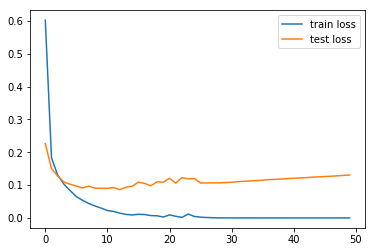

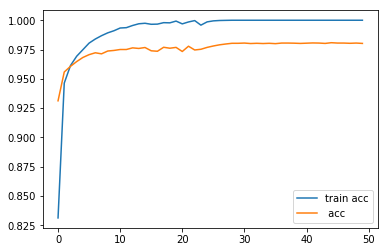

In [7]:
print("Log data: ", results.history.keys())

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

These results are not surprising. The model clearly overfits the data. In fact we are very lucky to be able to successfully train the model. Let's see what would happen a few years ago:

In [8]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(256, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))

model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=0, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

60000/60000 [==============================] - 1s 13us/step
Train accuracy:  [2.302001472091675, 0.11236666666666667]
10000/10000 [==============================] - 0s 13us/step
Test accuracy:  [2.3020178985595705, 0.1135]


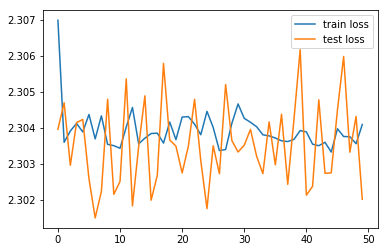

In [9]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

Are we doing something wrong? Let's try a simpler model!

In [10]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 1s - loss: 2.1668 - acc: 0.4233 - val_loss: 2.0026 - val_acc: 0.6701
Epoch 2/50
 - 1s - loss: 1.8679 - acc: 0.6953 - val_loss: 1.7187 - val_acc: 0.7389
Epoch 3/50
 - 1s - loss: 1.6047 - acc: 0.7427 - val_loss: 1.4692 - val_acc: 0.7696
Epoch 4/50
 - 1s - loss: 1.3790 - acc: 0.7712 - val_loss: 1.2624 - val_acc: 0.7921
Epoch 5/50
 - 1s - loss: 1.1960 - acc: 0.7930 - val_loss: 1.0993 - val_acc: 0.8116
Epoch 6/50
 - 1s - loss: 1.0531 - acc: 0.8085 - val_loss: 0.9735 - val_acc: 0.8201
Epoch 7/50
 - 1s - loss: 0.9430 - acc: 0.8205 - val_loss: 0.8767 - val_acc: 0.8330
Epoch 8/50
 - 1s - loss: 0.8576 - acc: 0.8313 - val_loss: 0.8010 - val_acc: 0.8404
Epoch 9/50
 - 1s - loss: 0.7902 - acc: 0.8380 - val_loss: 0.7410 - val_acc: 0.8497
Epoch 10/50
 - 1s - loss: 0.7362 - acc: 0.8444 - val_loss: 0.6923 - val_acc: 0.8536
Epoch 11/50
 - 1s - loss: 0.6922 - acc: 0.8502 - val_loss: 0.6520 - val_acc: 0.8613
Epoch 12/50
 - 1s - loss: 0.6557 - 

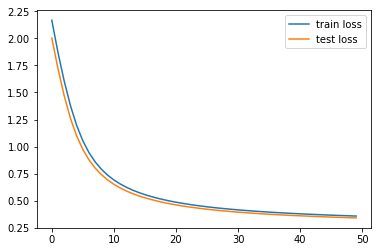

In [11]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

### So what makes deep learning work?

Careful initialization + appropriate activation functions + weight sharing / smart architectures + regularization

Tips:
1. Ensure that a good initialization scheme is used (e.g., Xavier, He, etc. )
2. Use an activation function that does not lead to vanishing gradients (e.g., relu, prelu, elu, ...)
3. Use a regularized network structure (e.g., CNNs, residual connection, ...)
4. Use regularization (e.g., dropout) and/or batch normalization
5. Use an advanced optimizer (e.g., Adam, RMSProp, ...) (use them with a grain of salt)